# Descarga de datos del censo de población y vivienda

Los datos del censo de población y vivienda se encuentran en la siguiente liga:

* https://www.inegi.org.mx/programas/ccpv/2020/default.html#Microdatos

En el apartado de microdatos se encuentran las opciones para descargar los datos a nivel AGEB y manzana. La información está ordenada por estado.

<img src="descarga_agebs.png">


In [1]:
# Cargamos la librerías
#!pip install geopandas
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely.geometry import Polygon, Point,LineString
import matplotlib.pyplot as plt
import contextily as ctx
import os

In [2]:
# Cargamos datos de la CDMX, Querétaro y Guanajuato
c_cdmx = pd.read_csv("RESAGEBURB_09_2020_csv.zip")
c_qrto = pd.read_csv("RESAGEBURB_22_2020_csv.zip")
c_guana = pd.read_csv("RESAGEBURB_11_2020_csv.zip")
c_cdmx = c_cdmx.query("MZA!=0")
c_qrto = c_qrto.query("MZA!=0")
c_guana = c_guana.query("MZA!=0")
c_cdmx

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,AGEB,MZA,POBTOT,POBFEM,...,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC
4,9,Ciudad de México,2,Azcapotzalco,1,Azcapotzalco,0010,1,159,86,...,45,42,39,18,13,6,*,0,9,0
5,9,Ciudad de México,2,Azcapotzalco,1,Azcapotzalco,0010,2,145,80,...,37,38,32,14,12,5,0,0,9,0
6,9,Ciudad de México,2,Azcapotzalco,1,Azcapotzalco,0010,3,124,64,...,29,28,25,11,15,7,0,*,6,0
7,9,Ciudad de México,2,Azcapotzalco,1,Azcapotzalco,0010,4,158,83,...,37,38,34,14,4,7,0,0,7,0
8,9,Ciudad de México,2,Azcapotzalco,1,Azcapotzalco,0010,5,154,86,...,42,42,38,12,5,6,0,0,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68936,9,Ciudad de México,17,Venustiano Carranza,1,Venustiano Carranza,1524,21,106,58,...,23,27,24,12,12,9,0,0,6,0
68937,9,Ciudad de México,17,Venustiano Carranza,1,Venustiano Carranza,1524,22,107,55,...,35,37,34,14,11,11,0,*,5,0
68938,9,Ciudad de México,17,Venustiano Carranza,1,Venustiano Carranza,1524,23,246,116,...,40,68,48,22,12,8,*,*,23,*
68939,9,Ciudad de México,17,Venustiano Carranza,1,Venustiano Carranza,1524,24,158,78,...,30,37,29,16,5,9,0,4,12,0


In [3]:
# Estadísticos descriptivos
c_qrto['POBTOT'].describe()
c_qrto['VIVTOT'].describe()


count    28793.000000
mean        22.861008
std         28.324654
min          0.000000
25%          7.000000
50%         17.000000
75%         30.000000
max        853.000000
Name: VIVTOT, dtype: float64

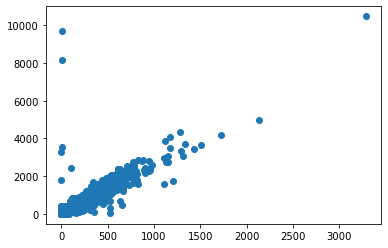

In [4]:
# Dispersión
plt.scatter(c_cdmx['VIVTOT'], c_cdmx['POBTOT'])
plt.show()

# Marco Geoestadístico. Censo de Población y Vivienda 2020

Los datos de las geometrías utilizadas en el censo de población y vivienda se encuentran en la siguiente liga:

* https://www.inegi.org.mx/app/biblioteca/ficha.html?upc=889463807469

La información está ordenada a nivel nacional y por estado. Las geometrías se presentan en formato shape file y están disponibles a nivel municipio, localidad, AGEB, entre otras.

<img src="descarga_geom.png">


<AxesSubplot:>

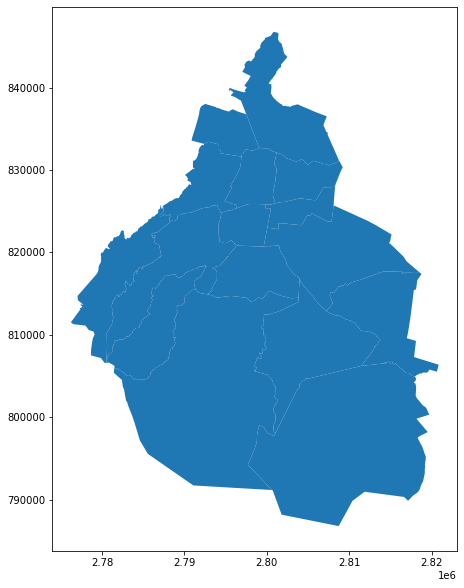

In [5]:
# Cargamos geometrías a nivel municipio
muni_cdmx = gpd.read_file("/home/milo/Datos/cdmx/conjunto_de_datos/09mun.shp")
muni_cdmx.plot(figsize=(10, 10))

In [6]:
muni_cdmx

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,geometry
0,09002,09,002,Azcapotzalco,"POLYGON ((2794859.977 837218.408, 2794861.690 ..."
1,09003,09,003,Coyoacán,"POLYGON ((2800218.995 820661.624, 2800250.439 ..."
2,09004,09,004,Cuajimalpa de Morelos,"POLYGON ((2787229.791 825329.285, 2787272.744 ..."
3,09005,09,005,Gustavo A. Madero,"POLYGON ((2802175.660 843326.718, 2801806.564 ..."
4,09006,09,006,Iztacalco,"POLYGON ((2808145.908 826363.205, 2808144.575 ..."
5,09007,09,007,Iztapalapa,"POLYGON ((2812453.035 823708.051, 2812495.143 ..."
6,09008,09,008,La Magdalena Contreras,"POLYGON ((2792518.205 818323.067, 2792478.173 ..."
7,09009,09,009,Milpa Alta,"POLYGON ((2814877.400 806710.534, 2814871.827 ..."
8,09010,09,010,Álvaro Obregón,"POLYGON ((2794395.922 824857.553, 2794434.245 ..."
9,09011,09,011,Tláhuac,"POLYGON ((2816579.320 817395.961, 2816605.020 ..."


<AxesSubplot:>

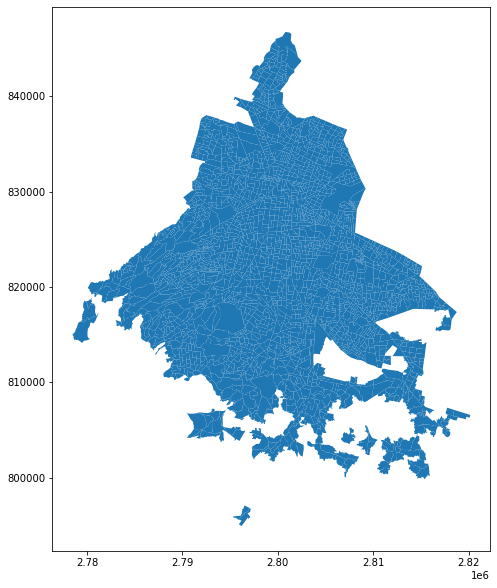

In [7]:
# Cargamos geometrías a nivel municipio
ageb_cdmx = gpd.read_file("/home/milo/Datos/cdmx/conjunto_de_datos/09a.shp")
ageb_cdmx.plot(figsize=(10, 10))

In [8]:
ageb_cdmx

,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,geometry
0,0901000011716,09,010,0001,1716,"POLYGON ((2787237.541 816989.461, 2787288.728 ..."
1,0901000012150,09,010,0001,2150,"POLYGON ((2794154.458 823013.444, 2794155.774 ..."
2,0901000011133,09,010,0001,1133,"POLYGON ((2795690.723 820050.788, 2795684.238 ..."
3,0901000011307,09,010,0001,1307,"POLYGON ((2792584.475 815678.668, 2792624.325 ..."
4,0901000010281,09,010,0001,0281,"POLYGON ((2788845.392 823526.074, 2788840.549 ..."
...,...,...,...,...,...,...
2426,0900700012564,09,007,0001,2564,"POLYGON ((2814016.268 821043.511, 2814019.319 ..."
2427,0900700012615,09,007,0001,2615,"POLYGON ((2814358.791 820744.850, 2814405.087 ..."
2428,0900700012969,09,007,0001,2969,"POLYGON ((2815993.470 819777.763, 2816019.848 ..."
2429,0900700013721,09,007,0001,3721,"POLYGON ((2807966.150 821578.350, 2807941.550 ..."


<AxesSubplot:>

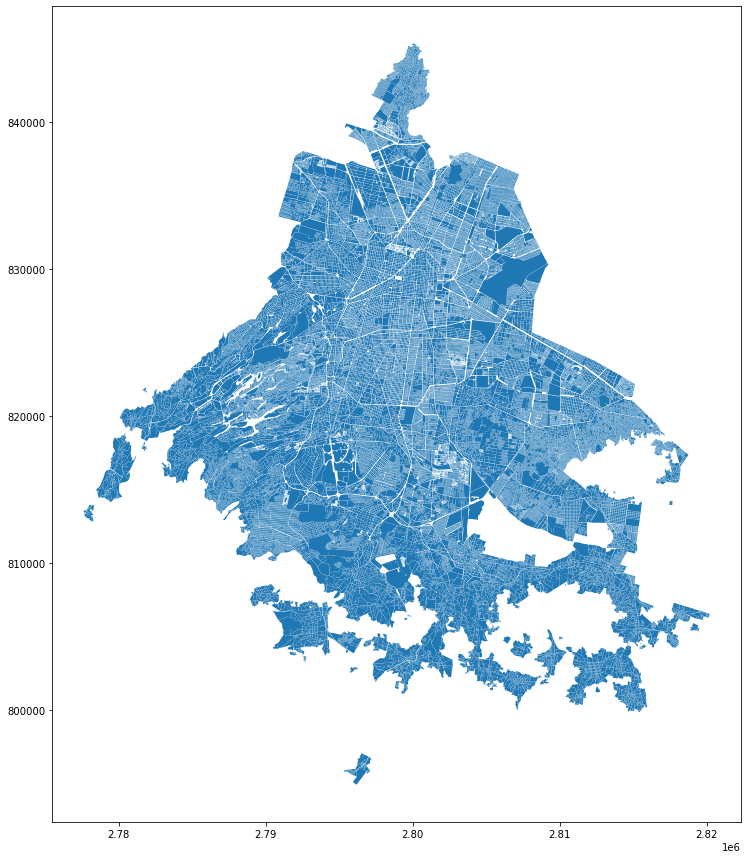

In [9]:
# Cargamos geometrías de manzanas
mzn_cdmx = gpd.read_file("/home/milo/Datos/cdmx/conjunto_de_datos/09m.shp")
mzn_cdmx.plot(figsize=(15, 15))

In [10]:
mzn_cdmx

,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,CVE_MZA,AMBITO,TIPOMZA,geometry
0,0901000010898031,09,010,0001,0898,031,Urbana,Típica,"POLYGON ((2790204.135 820779.247, 2790125.593 ..."
1,0901000012269024,09,010,0001,2269,024,Urbana,Típica,"POLYGON ((2791387.916 821465.156, 2791376.215 ..."
2,0901000011472068,09,010,0001,1472,068,Urbana,Típica,"POLYGON ((2788494.355 822775.106, 2788478.422 ..."
3,0901000011824024,09,010,0001,1824,024,Urbana,Típica,"POLYGON ((2790870.494 819456.298, 2790862.256 ..."
4,0901000012377004,09,010,0001,2377,004,Urbana,Típica,"POLYGON ((2792111.138 821977.886, 2792115.437 ..."
...,...,...,...,...,...,...,...,...,...
66784,0900700015376020,09,007,0001,5376,020,Urbana,Edificio-Manzana,"POLYGON ((2805560.493 815680.504, 2805559.129 ..."
66785,0900700015376021,09,007,0001,5376,021,Urbana,Contenedora,"POLYGON ((2805372.709 815883.364, 2805488.537 ..."
66786,0900700013045056,09,007,0001,3045,056,Urbana,Edificio-Manzana,"POLYGON ((2809738.035 818480.137, 2809737.767 ..."
66787,0900700013045032,09,007,0001,3045,032,Urbana,Contenedora,"POLYGON ((2809829.520 818566.731, 2809827.153 ..."


,CVE_ENT,CVE_MUN,NOM_MUN,clave,zm,geometry
0,01,011,San Francisco de los Romo,01011,ZM_de_Aguascalientes,"POLYGON ((-102.27368 22.08798, -102.27366 22.0..."
1,01,005,Jesús María,01005,ZM_de_Aguascalientes,"POLYGON ((-102.32387 21.93653, -102.32423 21.9..."
2,01,001,Aguascalientes,01001,ZM_de_Aguascalientes,"POLYGON ((-102.32387 21.93653, -102.32375 21.9..."
3,02,005,Playas de Rosarito,02005,ZM_de_Tijuana,"POLYGON ((-117.04078 32.41159, -117.04093 32.4..."
4,02,003,Tecate,02003,ZM_de_Tijuana,"POLYGON ((-116.65858 32.57374, -116.65744 32.5..."
...,...,...,...,...,...,...
405,15,090,Tenango del Valle,15090,ZM_de_Toluca,"POLYGON ((-99.68482 19.05583, -99.71651 19.053..."
406,15,106,Toluca,15106,ZM_de_Toluca,"POLYGON ((-99.56663 19.28611, -99.56761 19.286..."
407,15,058,Nezahualcóyotl,15058,ZM_del_Valle_de_México,"POLYGON ((-99.05095 19.43380, -99.05056 19.434..."
408,09,005,Gustavo A. Madero,09005,ZM_del_Valle_de_México,"POLYGON ((-99.09056 19.50955, -99.09053 19.509..."


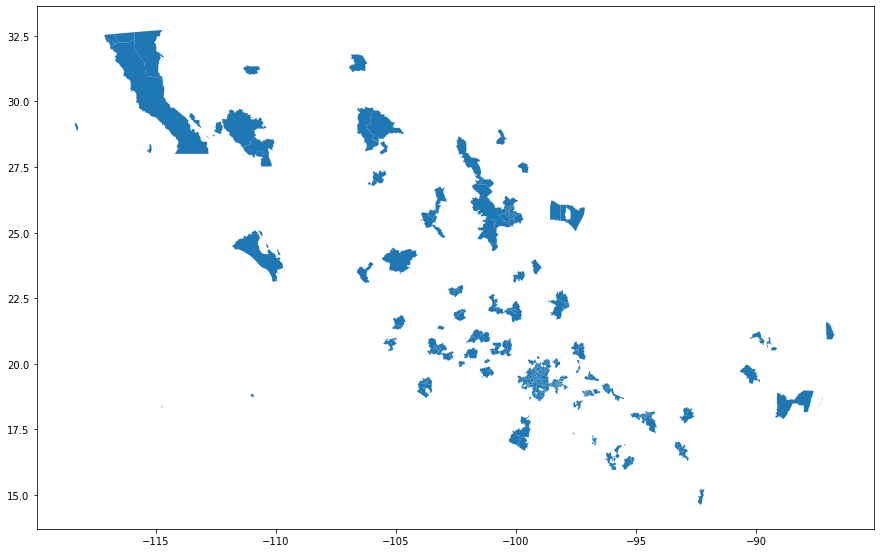

In [11]:
# Cargamos las geometrías de los municipios de las zonas metropolitanas de 2015
geom_zm = gpd.read_file("zm_geom.geojson")
geom_zm.plot(figsize=(15, 15))
geom_zm

<AxesSubplot:>

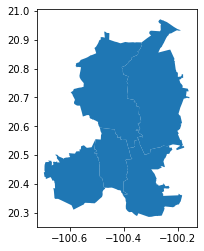

In [12]:
geom_zm.query("zm == 'ZM_de_Querétaro'").plot()

In [13]:
geom_zm.query("zm == 'ZM_de_Querétaro'")

,CVE_ENT,CVE_MUN,NOM_MUN,clave,zm,geometry
69,11,004,Apaseo el Alto,11004,ZM_de_Querétaro,"POLYGON ((-100.50699 20.53171, -100.50708 20.5..."
198,22,006,Corregidora,22006,ZM_de_Querétaro,"POLYGON ((-100.48626 20.59456, -100.48616 20.5..."
199,22,008,Huimilpan,22008,ZM_de_Querétaro,"POLYGON ((-100.33437 20.52625, -100.33422 20.5..."
200,22,011,El Marqués,22011,ZM_de_Querétaro,"POLYGON ((-100.25930 20.96817, -100.25697 20.9..."
201,22,014,Querétaro,22014,ZM_de_Querétaro,"POLYGON ((-100.47223 20.92845, -100.47091 20.9..."


In [14]:
### Cargamos datos del censo a nivel ageb del censo de 2020
zm_vm_2020 = gpd.read_file('https://github.com/milocortes/crecimiento_urbano/raw/main/datos/agebs_ZM_del_Valle_de_Mexico_2020.geojson')
### Cargamos datos del censo a nivel ageb del censo de 2020
zm_qrto_2020 = gpd.read_file('https://github.com/milocortes/crecimiento_urbano/raw/main/datos/agebs_ZM_de_Queretaro_2020.geojson')

<AxesSubplot:>

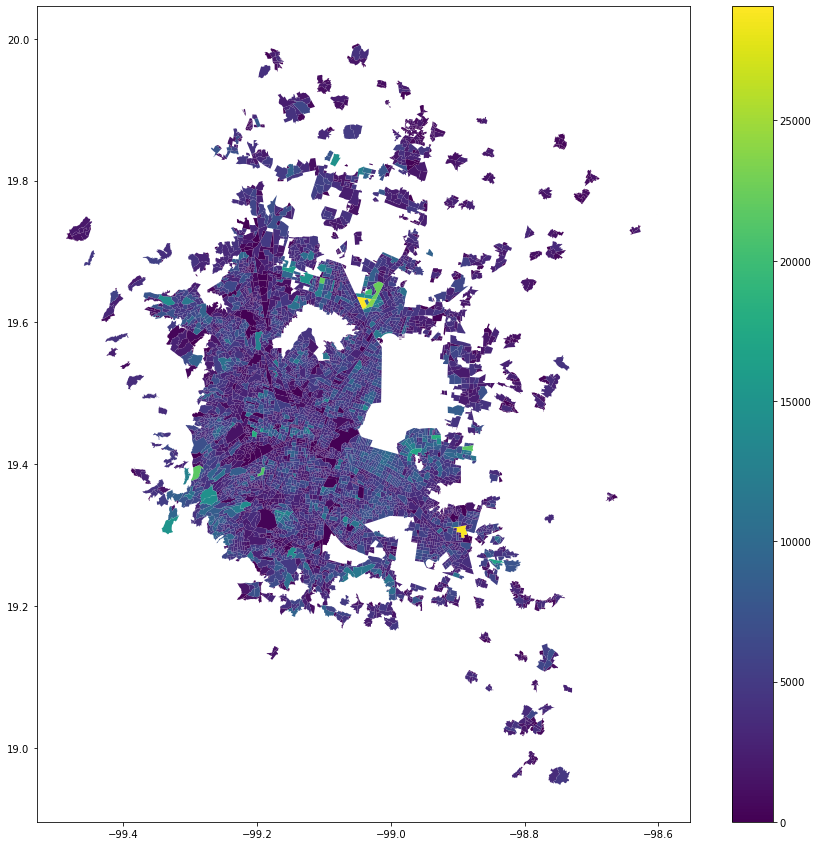

In [15]:
zm_vm_2020.plot(column='POBTOT', legend=True,figsize=(15, 15))

<AxesSubplot:>

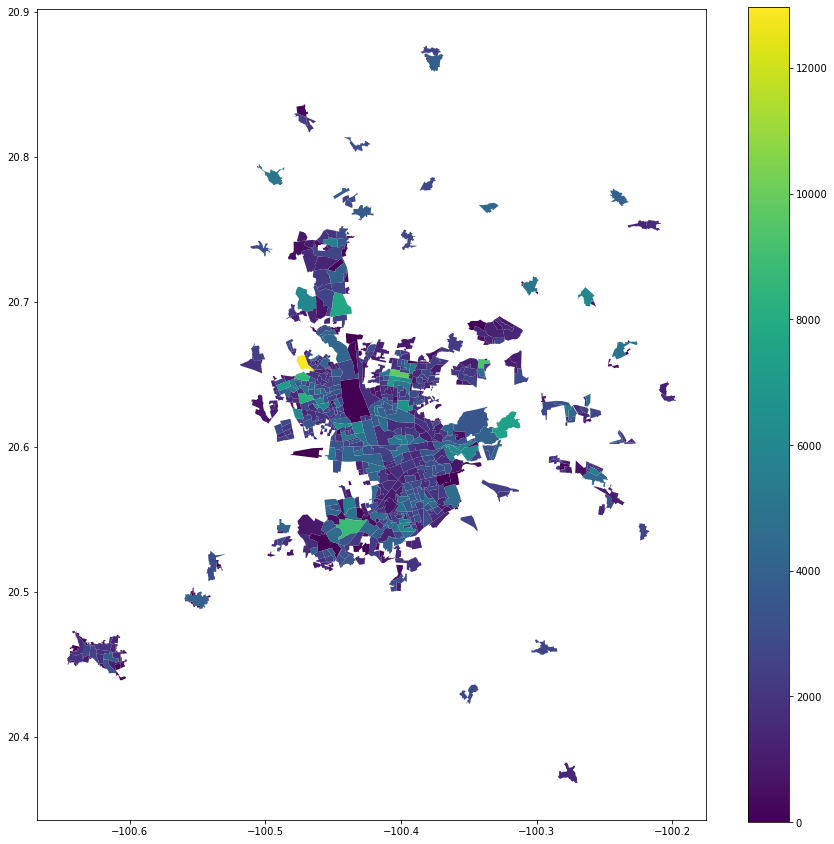

In [16]:
zm_qrto_2020.plot(column='POBTOT', legend=True,figsize=(15, 15))

### Agebs de la ZM de Querétaro

<AxesSubplot:>

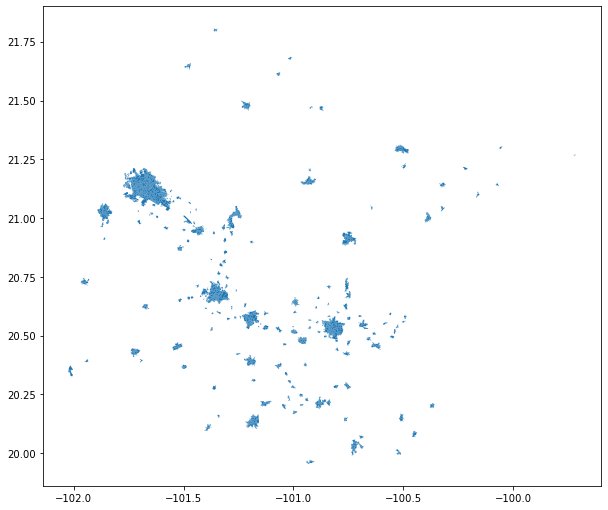

In [17]:
# Cargamos agebs de Guanajuato
guana =gpd.read_file("/home/milo/PCIC/Maestría/2doSemestre/redes_sis_complejos/proyecto/github/colab/11_guanajuato/conjunto_de_datos/11a.shp")
# Modificamos el sistema de referencia a EPSG:4326. 
# El EPSG 4326 corresponde al sistema WGS84 empleado para la representación de la cartografía a nivel mundial. 
guana = guana.to_crs(epsg=4326)
guana.plot(figsize=(10, 10))

<AxesSubplot:>

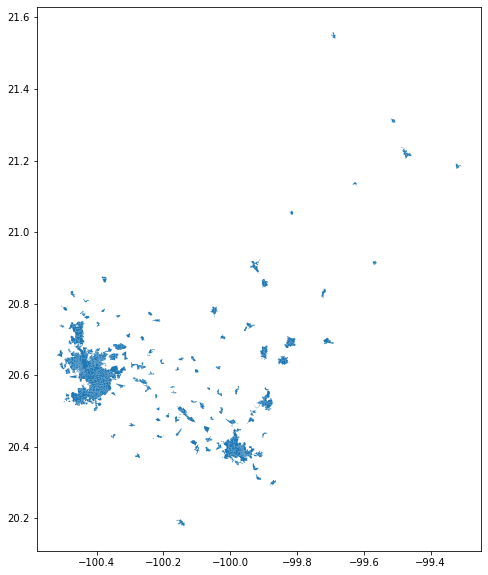

In [18]:
# Cargamos agebs de Querétaro
qrto = gpd.read_file("/home/milo/PCIC/Maestría/2doSemestre/redes_sis_complejos/proyecto/github/colab/22_queretaro/conjunto_de_datos/22a.shp")
# Modificamos el sistema de referencia a EPSG:4326. 
qrto = qrto.to_crs(epsg=4326)
qrto.plot(figsize=(10, 10))

<AxesSubplot:>

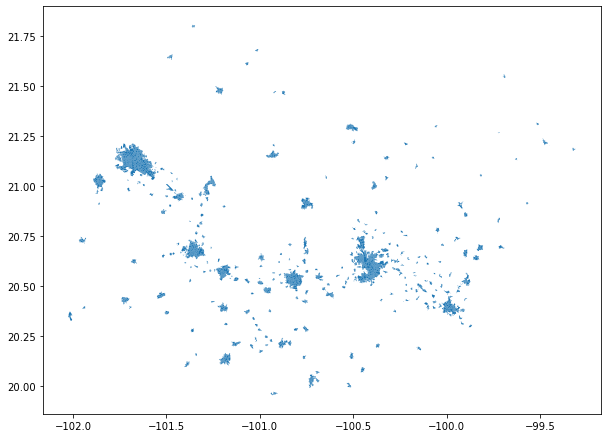

In [19]:
# Concatenamos los geodataframe de Guanajuato y Querétaro
zm_qrto = pd.concat([qrto,guana])
zm_qrto.plot(figsize=(10, 10))

<AxesSubplot:>

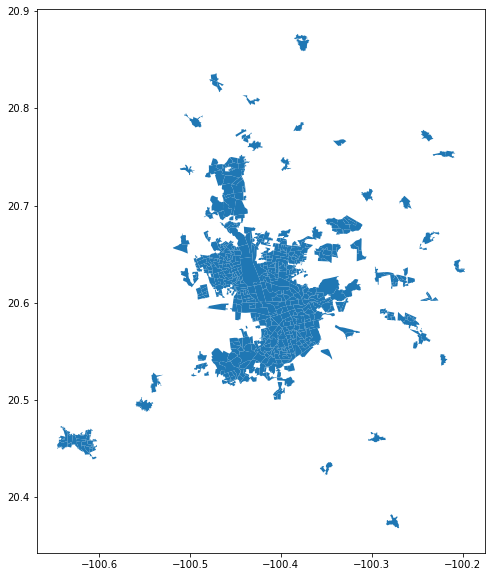

In [20]:
# Nos quedamos con los municipios de la zm de Querétaro
zm_qrto_geoms = geom_zm.query("zm == 'ZM_de_Querétaro'")
# Con el método overlay definimos el método de superposición espacial, en este casi es la intersección (how='intersection') con EL
# polígono de la zm de querétaro(zm_geoms.dissolve("zm")[['NOM_MUN','clave','geometry']]) y las agebs de Guanajuato y Querétaro
agebs_zm_qrto = gpd.overlay(zm_qrto_geoms.dissolve("zm")[['NOM_MUN','clave','geometry']],zm_qrto,how='intersection')
agebs_zm_qrto.plot(figsize=(10, 10))

In [21]:
agebs_zm_qrto

,NOM_MUN,clave,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,geometry
0,Apaseo el Alto,11004,2200601420706,22,006,0142,0706,"POLYGON ((-100.38957 20.54787, -100.38938 20.5..."
1,Apaseo el Alto,11004,2200600010725,22,006,0001,0725,"POLYGON ((-100.40673 20.54314, -100.40670 20.5..."
2,Apaseo el Alto,11004,2200600010142,22,006,0001,0142,"POLYGON ((-100.40969 20.54610, -100.40972 20.5..."
3,Apaseo el Alto,11004,2200600010212,22,006,0001,0212,"POLYGON ((-100.41446 20.54733, -100.41448 20.5..."
4,Apaseo el Alto,11004,2200600010759,22,006,0001,0759,"POLYGON ((-100.38777 20.53983, -100.38807 20.5..."
...,...,...,...,...,...,...,...,...
661,Apaseo el Alto,11004,1100400010506,11,004,0001,0506,"POLYGON ((-100.63928 20.46251, -100.63886 20.4..."
662,Apaseo el Alto,11004,1100400010489,11,004,0001,0489,"POLYGON ((-100.61011 20.44375, -100.60984 20.4..."
663,Apaseo el Alto,11004,1100400710563,11,004,0071,0563,"POLYGON ((-100.53318 20.51721, -100.53365 20.5..."
664,Apaseo el Alto,11004,110040001014A,11,004,0001,014A,"POLYGON ((-100.61017 20.46887, -100.60979 20.4..."


### Agregamos la información del censo a las agebs de la ZM de Querétaro

In [22]:
# Generamos las CVEGEO en los dataframe del censo de población y vivienda
# CVEGEO:
#         * (1-2) dígitos --> Entidad
#         * (3-5) dígitos --> Municipio
#         * (6-9) digitos --> Localidad
#         * (10-13) dígitos --> AGEB
c_guana['CVEGEO'] = c_guana["ENTIDAD"].apply("{0:0=2d}".format)+c_guana["MUN"].apply("{0:0=3d}".format)+c_guana["LOC"].apply("{0:0=4d}".format)+c_guana["AGEB"]
c_qrto['CVEGEO'] = c_qrto["ENTIDAD"].apply("{0:0=2d}".format)+c_qrto["MUN"].apply("{0:0=3d}".format)+c_qrto["LOC"].apply("{0:0=4d}".format)+c_qrto["AGEB"]
c_agebs_zm_qrto = pd.concat([c_guana,c_qrto])
# Remplazamos valores '*' por cero
c_agebs_zm_qrto = c_agebs_zm_qrto.apply(lambda x : x.replace('*', '0') if isinstance(x,object) else x)
c_agebs_zm_qrto = c_agebs_zm_qrto.apply(lambda x : x.replace('N/D', '0') if isinstance(x,object) else x)
# Definimos a CVEGEO como índice
c_agebs_zm_qrto = c_agebs_zm_qrto.set_index('CVEGEO')
# Removemos algunas columnas
c_agebs_zm_qrto = c_agebs_zm_qrto.drop(columns=['ENTIDAD','NOM_ENT','MUN','NOM_MUN','LOC','NOM_LOC','AGEB','MZA'])
# Modificamos a flotante el tipo de las columnas
c_agebs_zm_qrto = c_agebs_zm_qrto.astype(str).astype(float)
# Convertimos el índice a columna
c_agebs_zm_qrto.reset_index(level=0, inplace=True)
# Agrupamos por CVEGEO
c_agebs_zm_qrto = c_agebs_zm_qrto.groupby(['CVEGEO']).sum()
c_agebs_zm_qrto.reset_index(level=0, inplace=True)
# Hacemos un join de los polígonos de la ZM de Querétaro con los datos del censo de población y vivienda
agebs_zm_qrto = pd.merge(left=agebs_zm_qrto, right=c_agebs_zm_qrto, how='inner', left_on='CVEGEO', right_on='CVEGEO')
# Guardamos el archivo como .geojson
agebs_zm_qrto.to_file("censo_agebs_zm_qrto.geojson", driver='GeoJSON')


<AxesSubplot:>

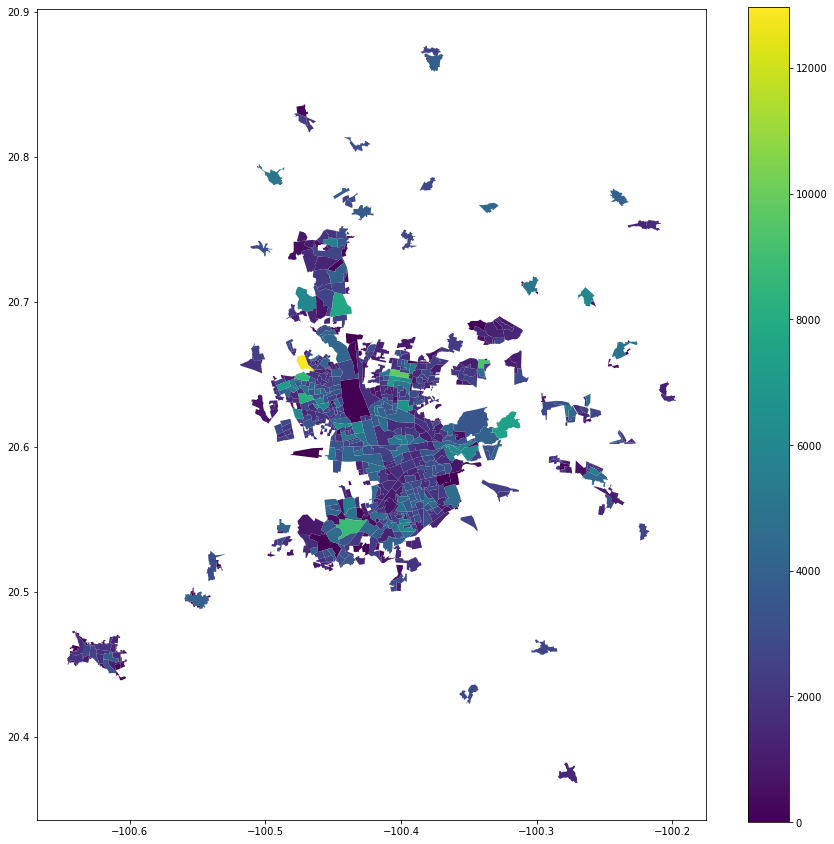

In [23]:
agebs_zm_qrto.plot(column='POBTOT', legend=True,figsize=(15, 15))

# Directorio Estadístico Nacional de Unidades Económicas	(DENUE)

La liga de descarga de los datos del DENUE es la siguiente:
* https://www.inegi.org.mx/app/mapa/denue/default.aspx


In [24]:
denue = gpd.read_file("/home/milo/PCIC/Maestría/2doSemestre/redes_sis_complejos/proyecto/github/colab/INEGI_DENUE_03092021/INEGI_DENUE_03092021.shp")
denue

,id,clee,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,...,ageb,manzana,telefono,correoelec,www,tipoUniEco,latitud,longitud,fecha_alta,geometry
0,6167868,04004114119000471001000000U2,"PESCA Y CAPTURA DE OTROS PECES, CRUSTÁCEOS, MO...",None,114119,"Pesca y captura de peces, crustáceos, moluscos...",0 a 5 personas,CALLE,12,CALLE,...,0968,038,9821313633,None,None,Fijo,19.344976,-90.731714,2010-07,POINT (-90.73171 19.34498)
1,6167887,04004114119002751001000000U5,"PESCA Y CAPTURA DE OTROS PECES, CRUSTÁCEOS, MO...",None,114119,"Pesca y captura de peces, crustáceos, moluscos...",0 a 5 personas,CALLE,CARLOS SANSORES PÉREZ,CALLE,...,0968,038,9821310229,None,None,Fijo,19.345769,-90.731345,2010-07,POINT (-90.73135 19.34577)
2,6167877,04004114119001011001000000U5,"PESCA Y CAPTURA DE OTROS PECES, CRUSTÁCEOS, MO...",None,114119,"Pesca y captura de peces, crustáceos, moluscos...",0 a 5 personas,CALLE,CARLOS SANSORES PÉREZ,CALLE,...,0968,038,None,None,None,Fijo,19.351186,-90.728808,2010-07,POINT (-90.72881 19.35119)
3,6168081,04004114119002083001000000U3,"PESCADORES DE LA BAHIA, S. DE R.L DE C.V",PESCADORES DE LA BAHIA S DE RL DE CV,114119,"Pesca y captura de peces, crustáceos, moluscos...",11 a 30 personas,AVENIDA,CARLOS SANSORES PÉREZ,CALLE,...,1951,027,None,None,None,Fijo,19.354958,-90.726578,2010-07,POINT (-90.72658 19.35496)
4,6167920,04004114119000131000000000U2,"PESCA Y CAPTURA DE OTROS PECES, CRUSTÁCEOS, MO...",None,114119,"Pesca y captura de peces, crustáceos, moluscos...",0 a 5 personas,CALLE,CARLOS SANSORES PÉREZ,CALLE,...,0968,038,9821204721,None,None,Fijo,19.351477,-90.728671,2010-07,POINT (-90.72867 19.35148)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,6167832,04004114119002414000000000O1,LOS ULTIMOS SC DE RL,LOS ULTIMOS SC DE RL,114119,"Pesca y captura de peces, crustáceos, moluscos...",11 a 30 personas,CALLE,45,CALLE,...,1006,027,9821191491,IRIANRENE@HOTMAIL.COM,None,Fijo,19.344640,-90.720944,2010-07,POINT (-90.72094 19.34464)
132,7888969,04004114119003654000000000O0,KUKULKAN DE PARAISO SC DE RL,KUKULKAN DE PARAISO SC DE RL,114119,"Pesca y captura de peces, crustáceos, moluscos...",11 a 30 personas,CALLE,15 B X 2,CALLE,...,1006,027,9828290556,SIN@CORREO.COM,None,Fijo,19.344640,-90.720944,2019-11,POINT (-90.72094 19.34464)
133,6167751,04004114119001191001000000U5,"PESCA Y CAPTURA DE OTROS PECES, CRUSTÁCEOS, MO...",None,114119,"Pesca y captura de peces, crustáceos, moluscos...",0 a 5 personas,CALLE,CARLOS SANSORES PÉREZ,CALLE,...,0972,039,9821325102,None,None,Fijo,19.344294,-90.732033,2010-07,POINT (-90.73203 19.34429)
134,6167910,04004114119000651001000000U9,MARCIAL TAMAY AC,None,114119,"Pesca y captura de peces, crustáceos, moluscos...",0 a 5 personas,CALLE,CALLE DEL MUELLE,CALLE,...,1025,006,9821156164,None,None,Fijo,19.361916,-90.719063,2010-07,POINT (-90.71906 19.36192)


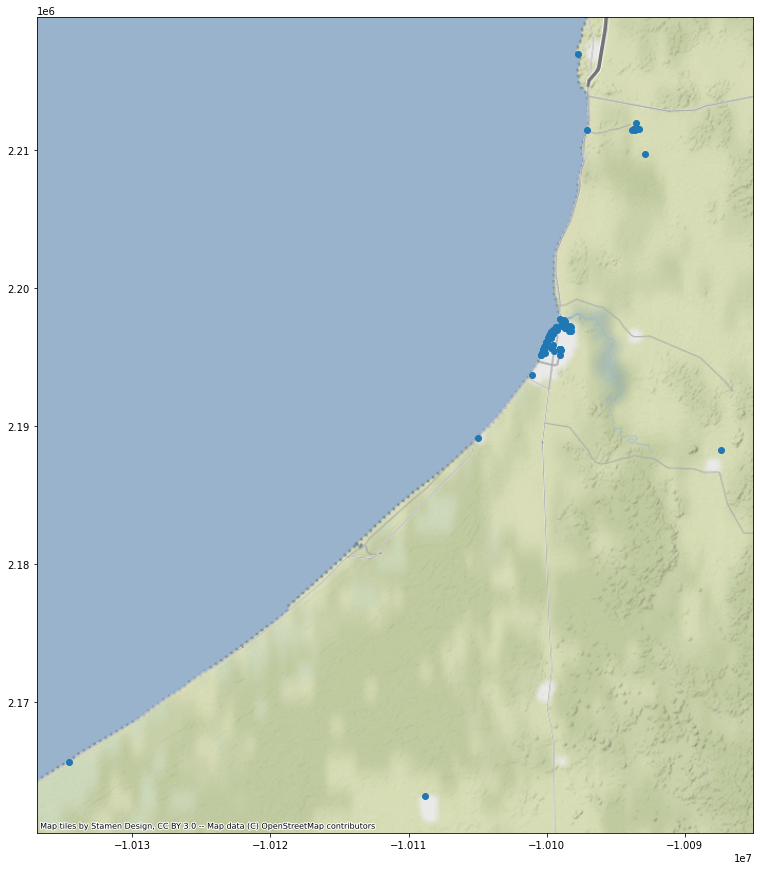

In [25]:
# Como los serividores de mapas web están por lo general en Web Mercator (EPSG 3857), cambiamos el sistema de refencia
ax= denue.to_crs('EPSG:3857').plot(figsize=(15, 15))

ctx.add_basemap(ax)


# Censos Económicos
La liga para el Sistema Automatizado de Información Censal (SAIC) es la siguiente:
* https://www.inegi.org.mx/app/saic/default.html